Import a video and use mediaPip to extract pose landmarkers for each frame

In [1]:
from utils.videoProcessingFunctions import *
from utils.poseFunctions import *

import matplotlib.pyplot as plt

BaseOptions = mp.tasks.BaseOptions
PoseLandmarker = mp.tasks.vision.PoseLandmarker
PoseLandmarkerOptions = mp.tasks.vision.PoseLandmarkerOptions
VisionRunningMode = mp.tasks.vision.RunningMode

# model_path = "assets/pose_landmarker_heavy.task"
model_path = "assets/pose_landmarker_lite.task"
video_path = "media/realspeed/Cross.mp4"
# video_path = "media/realspeed/hook.mp4"
options = PoseLandmarkerOptions(
    base_options=BaseOptions(model_asset_path=model_path),
    running_mode=VisionRunningMode.VIDEO,
    output_segmentation_masks=True,
)
pose_landmarker_results = get_landmarker_results_from_video(
    video_path, options, end_time_ms=25 * 1e3
)

fps=29.997469672424373


c:\Users\adware\Desktop\boxing_dynamics\.venv\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Can't read frame. Skipping...


Ploting Limb length over time

In [2]:
import matplotlib.pyplot as plt

def get_landmarkers(pose_landmarker_results, world_or_image='image'):
    ''' extract the landmarker points as a list from the pose_landmarker_results dict ;
    world_or_image : 'image' or 'world' to select between pose_landmarks or pose_world_landmarks '''

    num_frames = len(pose_landmarker_results)
    landmarker_list = []

    for i in range(num_frames):
        if world_or_image == 'image':
            landmarks = pose_landmarker_results[i]['landmarker_results'].pose_landmarks[0]
        elif world_or_image == 'world':
            landmarks = pose_landmarker_results[i]['landmarker_results'].pose_world_landmarks[0]
        else:
            raise ValueError("world_or_image must be 'image' or 'world'")
        
        frame_landmarks = np.array([[lm.x, lm.y, lm.z] for lm in landmarks])
        landmarker_list.append(frame_landmarks)

    landmarker_array = np.array(landmarker_list)
    # print('landmarker_array shape : ', landmarker_array.shape)

    return np.array(landmarker_list)


def determine_limb_length(limb_name: str, pose_landmarker_results, world_or_image='world'): 
    ''' used to determine and plot the length over time of a limb segment ; 
    should be relatively constant if the keypoints are accurate '''

    # forearms
    if limb_name == "left_forearm":
        proximal_index = 13  # left elbow
        distal_index = 15    # left wrist
    if limb_name == "right_forearm":
        proximal_index = 14  # right elbow
        distal_index = 16    # right wrist

    # upper arm segments (bicep/triceps)
    if limb_name == "left_upper_arm":
        proximal_index = 11  # left shoulder
        distal_index = 13    # left elbow
    if limb_name == "right_upper_arm":
        proximal_index = 12  # right shoulder
        distal_index = 14    # right elbow

    # thigh segments
    if limb_name == "left_thigh":
        proximal_index = 23  # left hip
        distal_index = 25    # left knee
    if limb_name == "right_thigh":
        proximal_index = 24  # right hip
        distal_index = 26    # right knee
    
    # shin segments
    if limb_name == "left_shin":
        proximal_index = 25  # left knee
        distal_index = 27    # left ankle
    if limb_name == "right_shin":
        proximal_index = 26  # right knee
        distal_index = 28    # right ankle

    num_frames = len(pose_landmarker_results)
    lengths = np.zeros(num_frames)

    if world_or_image == 'image':
        landmarks = get_landmarkers(pose_landmarker_results, world_or_image='image')
        ylabel = 'Limb Length (pixels units)'
    elif world_or_image == 'world':
        landmarks = get_landmarkers(pose_landmarker_results, world_or_image='world')
        ylabel = 'Limb Length (world units)'
    proximal_xyz = landmarks[:, proximal_index]
    distal_xyz = landmarks[:, distal_index]

    for i in range(num_frames):
        lengths[i] = np.linalg.norm(distal_xyz[i] - proximal_xyz[i])
        
    time_steps = np.arange(num_frames)
    plt.plot(time_steps, lengths, label=limb_name)
    plt.xlabel('Frame')
    plt.ylabel(ylabel)
    plt.title(f'Limb Length Over Time: {limb_name}')


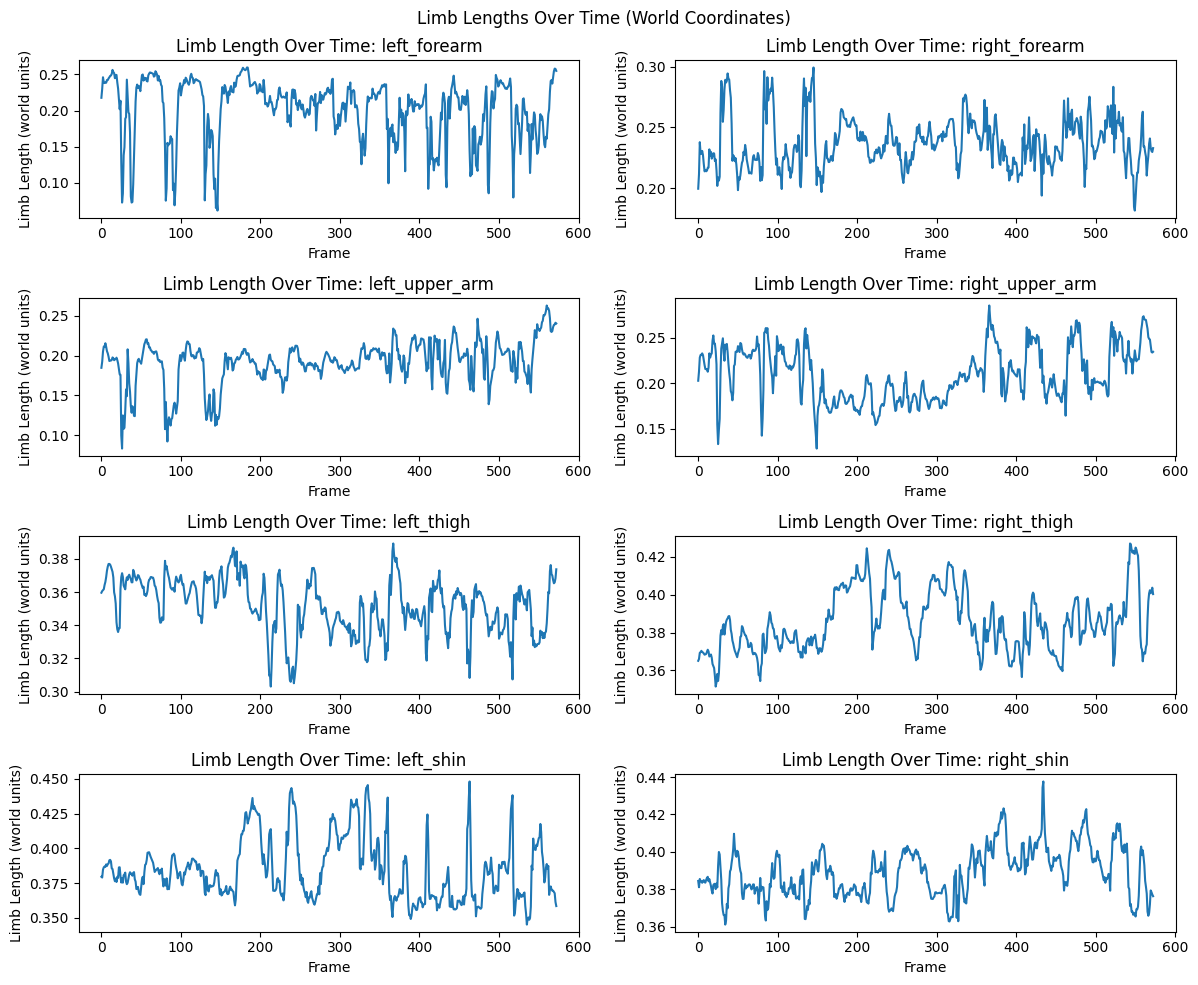

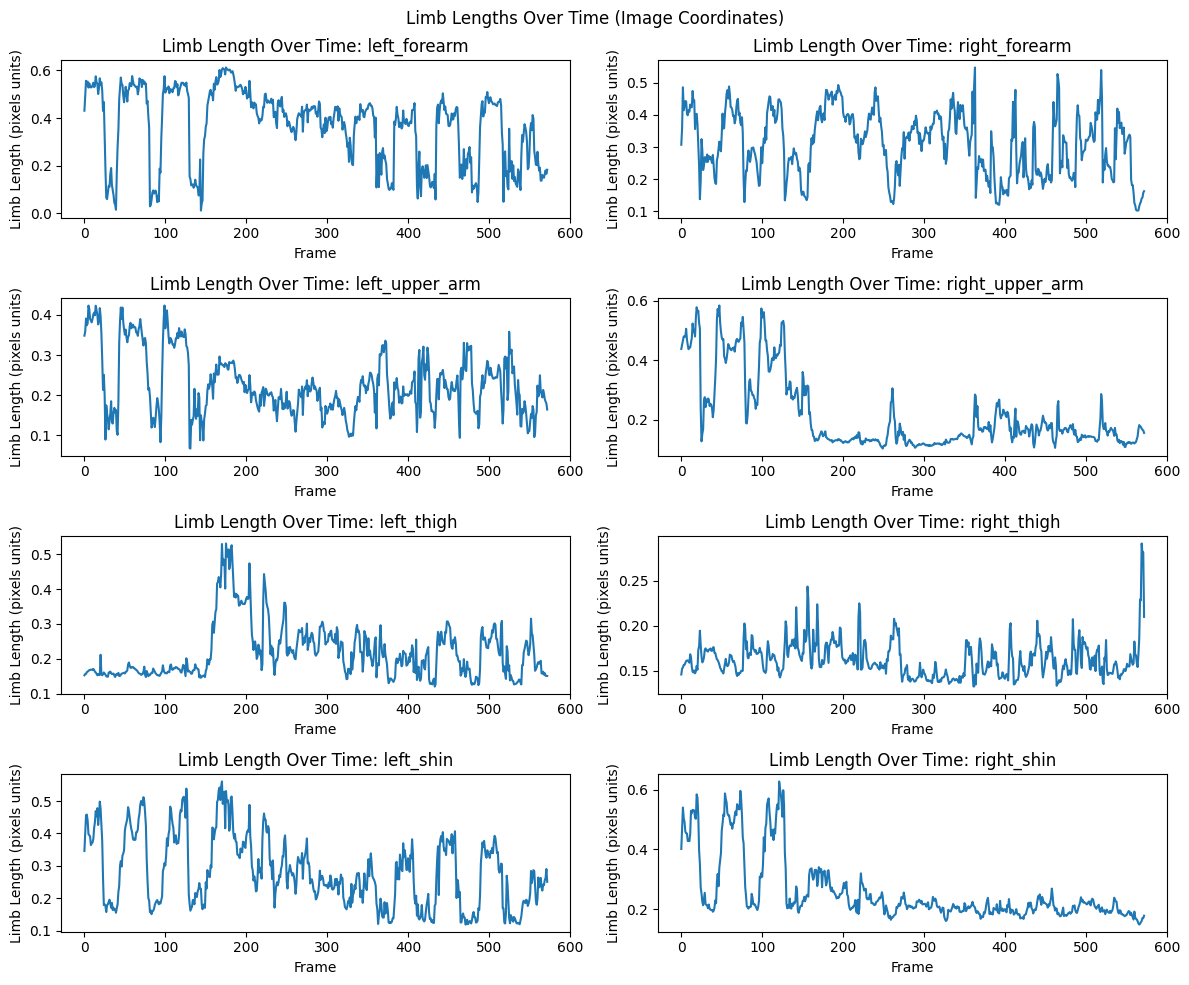

In [3]:
# plot the lengths of various limb segments in a 2x2 grid world coordinates
plt.figure(figsize=(12, 10))
plt.subplot(4, 2, 1)
determine_limb_length("left_forearm", pose_landmarker_results, 'world')
plt.subplot(4, 2, 2)
determine_limb_length("right_forearm", pose_landmarker_results, 'world')
plt.subplot(4, 2, 3)
determine_limb_length("left_upper_arm", pose_landmarker_results, 'world')
plt.subplot(4, 2, 4)
determine_limb_length("right_upper_arm", pose_landmarker_results, 'world')
plt.subplot(4, 2, 5)
determine_limb_length("left_thigh", pose_landmarker_results, 'world')
plt.subplot(4, 2, 6)
determine_limb_length("right_thigh", pose_landmarker_results, 'world')
plt.subplot(4, 2, 7)
determine_limb_length("left_shin", pose_landmarker_results, 'world')
plt.subplot(4, 2, 8)
determine_limb_length("right_shin", pose_landmarker_results, 'world')
plt.suptitle('Limb Lengths Over Time (World Coordinates)')
plt.tight_layout()

# plot the lengths of various limb segments in a 2x2 grid image coordinates
plt.figure(figsize=(12, 10))
plt.subplot(4, 2, 1)
determine_limb_length("left_forearm", pose_landmarker_results, 'image')
plt.subplot(4, 2, 2)
determine_limb_length("right_forearm", pose_landmarker_results, 'image')
plt.subplot(4, 2, 3)
determine_limb_length("left_upper_arm", pose_landmarker_results, 'image')
plt.subplot(4, 2, 4)
determine_limb_length("right_upper_arm", pose_landmarker_results, 'image')
plt.subplot(4, 2, 5)
determine_limb_length("left_thigh", pose_landmarker_results, 'image')
plt.subplot(4, 2, 6)
determine_limb_length("right_thigh", pose_landmarker_results, 'image')
plt.subplot(4, 2, 7)
determine_limb_length("left_shin", pose_landmarker_results, 'image')
plt.subplot(4, 2, 8)
determine_limb_length("right_shin", pose_landmarker_results, 'image')
plt.suptitle('Limb Lengths Over Time (Image Coordinates)')
plt.tight_layout()

In [56]:
print("Pose landmarks results retrieved from video.")
frame_idx=0
print(type(pose_landmarker_results[frame_idx]))
print('The three data keys stored in pose_landmarker_results is : \n' , pose_landmarker_results[frame_idx].keys(), '\n')

print('for the last key pose_landmarkers, the type is : \n', type(pose_landmarker_results[frame_idx]['landmarker_results']))

print ('in the mediapipe_pose_landmarker class, there are two attributes : pose_landmarks and pose_world_landmarks; \nboth are type list with 33 points each. \n')

pose_landmarker_results[frame_idx]['landmarker_results'].pose_world_landmarks[0][0:10]
pose_landmarker_results[frame_idx]['landmarker_results'].pose_landmarks[0][0:10]


# len(pose_landmarker_results[frame_idx]['landmarker_results'].pose_landmarks[0])
# len(pose_landmarker_results[frame_idx]['landmarker_results'].pose_landmarks[1])


Pose landmarks results retrieved from video.
<class 'dict'>
The three data keys stored in pose_landmarker_results is : 
 dict_keys(['timestamp_ms', 'original_frame', 'landmarker_results']) 

for the last key pose_landmarkers, the type is : 
 <class 'mediapipe.tasks.python.vision.pose_landmarker.PoseLandmarkerResult'>
in the mediapipe_pose_landmarker class, there are two attributes : pose_landmarks and pose_world_landmarks; 
both are type list with 33 points each. 



[NormalizedLandmark(x=0.3677097260951996, y=0.25037339329719543, z=-0.302018404006958, visibility=0.9999935626983643, presence=0.9999951124191284),
 NormalizedLandmark(x=0.3826901316642761, y=0.24166421592235565, z=-0.2463923543691635, visibility=0.9999842643737793, presence=0.9999840259552002),
 NormalizedLandmark(x=0.3916625678539276, y=0.2428555190563202, z=-0.2464272677898407, visibility=0.9999765157699585, presence=0.9999821186065674),
 NormalizedLandmark(x=0.39966872334480286, y=0.2437129020690918, z=-0.24629105627536774, visibility=0.9999761581420898, presence=0.9999793767929077),
 NormalizedLandmark(x=0.355766624212265, y=0.2387685775756836, z=-0.27171313762664795, visibility=0.9999847412109375, presence=0.9999861717224121),
 NormalizedLandmark(x=0.3463990092277527, y=0.2382824867963791, z=-0.2719302177429199, visibility=0.9999793767929077, presence=0.9999858140945435),
 NormalizedLandmark(x=0.338606059551239, y=0.2381720244884491, z=-0.2720157206058502, visibility=0.9999798536

Add a FBD to a specific frame

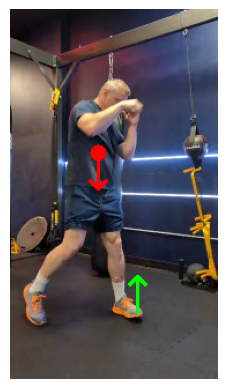

In [ ]:
from utils.videoProcessingFunctions import drawFBD

# grab the frame
frame_idx = 150
original_frame_bgr = pose_landmarker_results[frame_idx]["original_frame"]

# draw the FBD on the frame using created function
frame_w_FBD = drawFBD(pose_landmarker_results, frame_idx, original_frame_bgr)

# display the frame with the FBD added
plt.close("all")
plt.imshow(frame_w_FBD)
plt.axis("off")  # hide axes
plt.show()

plot the visibility of a point over time

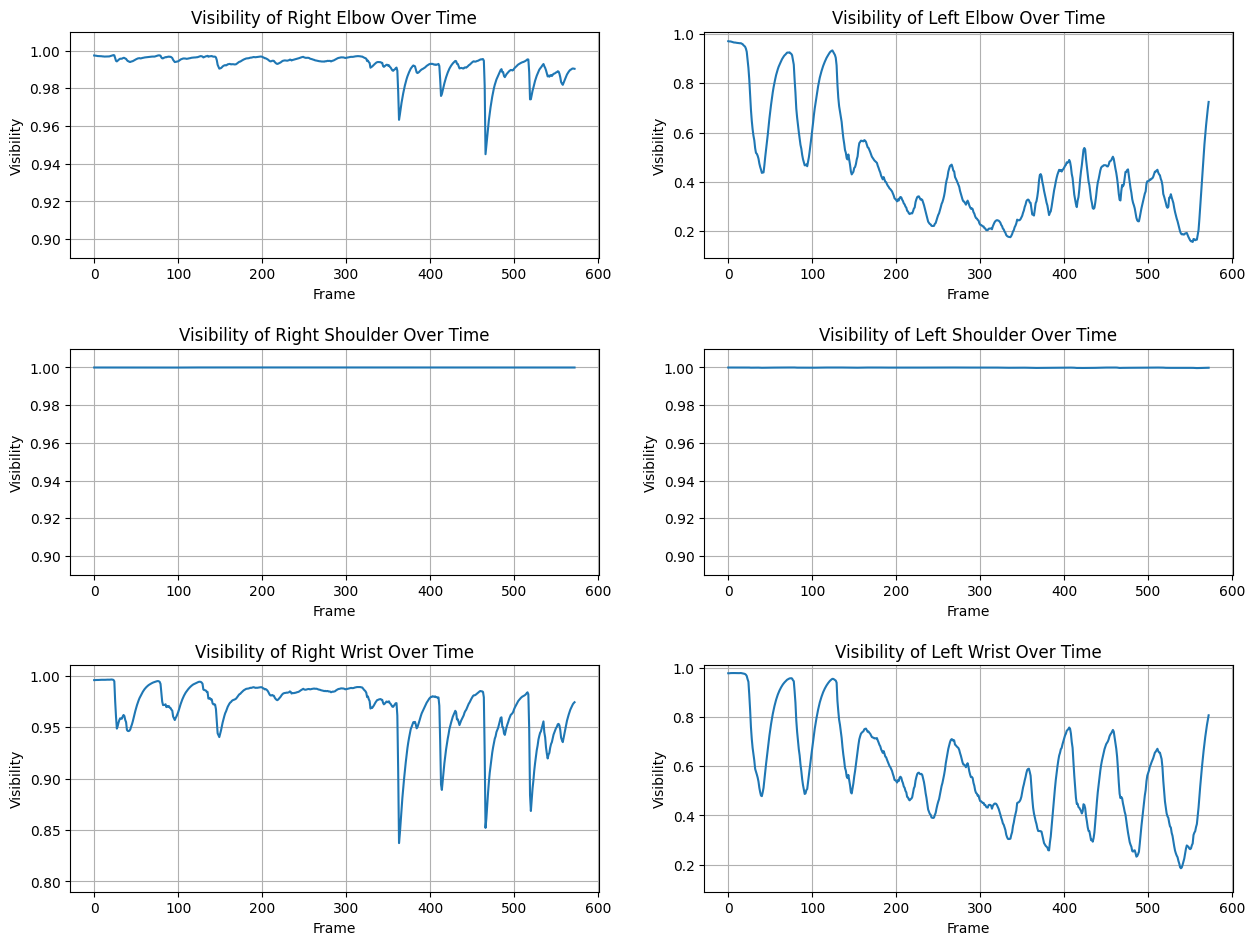

In [6]:
import numpy as np

from utils.videoProcessingFunctions import get_keypoint_name_from_index

def plot_visibility_over_time(pose_landmarker_results, landmark_index):
    keypoint_name = str(get_keypoint_name_from_index(landmark_index))
    keypoint_name = keypoint_name.replace("_", " ").title()

    num_frames = len(pose_landmarker_results)
    visibilities = np.zeros(num_frames)
    for i in range(num_frames):
        visibilities[i] = pose_landmarker_results[i]["landmarker_results"].pose_world_landmarks[0][landmark_index].visibility

    min_visibility = np.min(visibilities)
    max_visibility = np.max(visibilities)

    plt.plot(visibilities)
    plt.xlabel("Frame")
    plt.ylabel("Visibility")
    plt.title(f"Visibility of {keypoint_name} Over Time")
    # plt.ylim(np.round(min_visibility, decimals=1), np.round(max_visibility, decimals=1))
    plt.ylim(
        np.floor(min_visibility * 10) / 10 - 0.01,
        np.ceil(max_visibility * 10) / 10 + 0.01
    )
    plt.grid()

# create a 3,2 subplot of visibility over time for the following keypoints:
# Right Elbow (14), Wrist (16), Shoulder (12); 
# Left Elbow (13), Wrist (15), Shoulder (11)
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
plt.subplot(3, 2, 1)    
plot_visibility_over_time(pose_landmarker_results, landmark_index=14)  # Right Elbow
plt.subplot(3, 2, 2)
plot_visibility_over_time(pose_landmarker_results, landmark_index=13)  # Left Elbow
plt.subplot(3, 2, 3)   
plot_visibility_over_time(pose_landmarker_results, landmark_index=12)  # Right Shoulder
plt.subplot(3, 2, 4)
plot_visibility_over_time(pose_landmarker_results, landmark_index=11)  # Left Shoulder
plt.subplot(3, 2, 5)
plot_visibility_over_time(pose_landmarker_results, landmark_index=16)  # Right Wrist
plt.subplot(3, 2, 6)
plot_visibility_over_time(pose_landmarker_results, landmark_index=15)  # Left Wrist
fig.subplots_adjust(top=0.93, bottom=0.07, hspace=0.4)


Replace the low visibility points on the left wrist with the last high visibility point

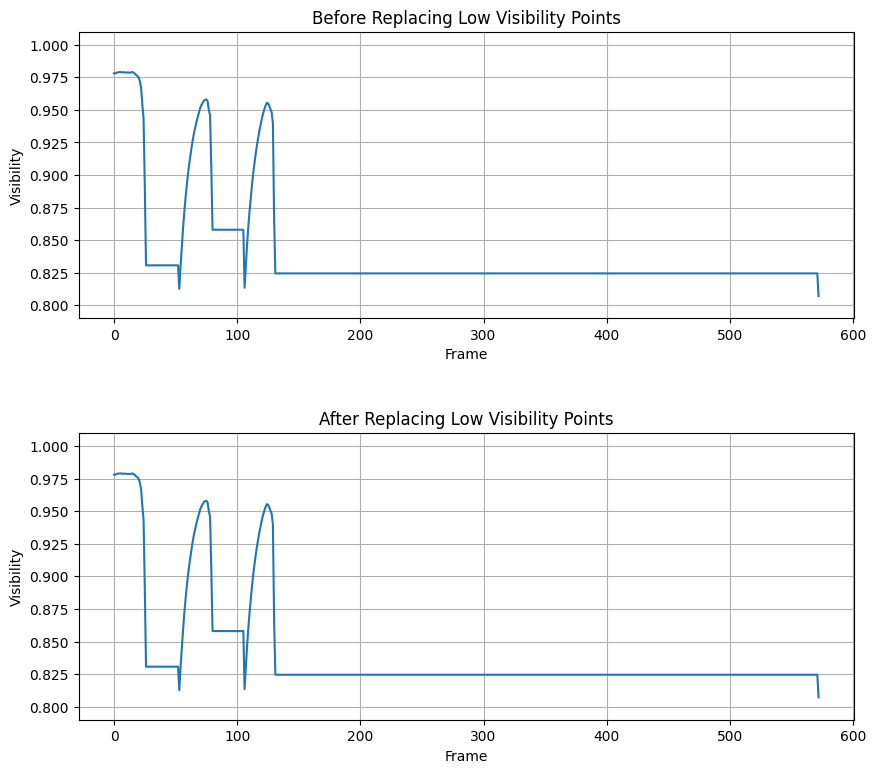

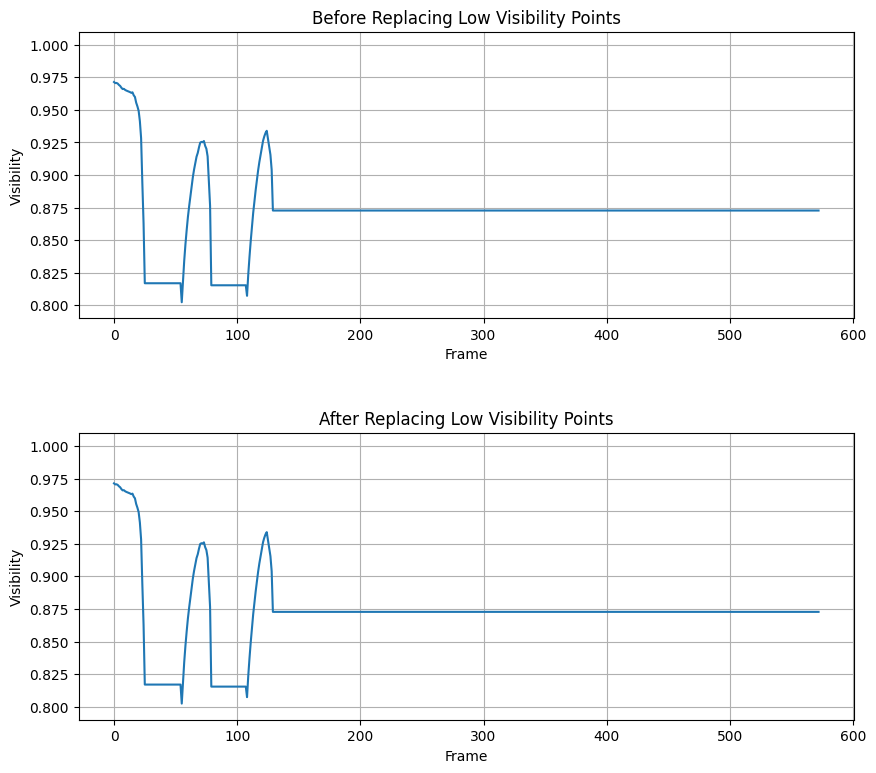

In [10]:
def visibility_mask(visibility_limit, pose_landmarker_results, landmark_index):
    """Create a mask for visibility below a certain limit."""
    num_frames = len(pose_landmarker_results)
    mask = np.zeros(num_frames, dtype=bool)
    for i in range(num_frames):
        visibility = pose_landmarker_results[i]["landmarker_results"].pose_world_landmarkers[0][landmark_index].visibility
        if visibility < visibility_limit:
            mask[i] = True
    return mask

def replace_low_visibility_points(pose_landmarker_results, landmark_index, visibility_limit=0.5):
    """Replace low visibility points with the last high visibility point."""
    num_frames = len(pose_landmarker_results)
    last_high_visibility_point = None

    for i in range(num_frames):
        landmark = pose_landmarker_results[i]["landmarker_results"].pose_world_landmarks[0][landmark_index]
        if landmark.visibility >= visibility_limit:
            last_high_visibility_point = landmark
        else:
            if last_high_visibility_point is not None:
                pose_landmarker_results[i]["landmarker_results"].pose_world_landmarks[0][landmark_index] = last_high_visibility_point
    return pose_landmarker_results

# create a 2,1 subplot of visibility over time for the left wrist (15)
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
plt.subplot(2, 1, 1)
plot_visibility_over_time(pose_landmarker_results, landmark_index=15)  # Left Wrist
plt.title("Before Replacing Low Visibility Points")
plt.subplot(2, 1, 2)
pose_landmarker_results = replace_low_visibility_points(pose_landmarker_results, landmark_index=15, visibility_limit=0.75)   # Replace low visibility points on the left wrist (15)
plot_visibility_over_time(pose_landmarker_results, landmark_index=15)  # Left Wrist
plt.title("After Replacing Low Visibility Points")
fig.subplots_adjust(top=0.93, bottom=0.07, hspace=0.4)


# create a 2,1 subplot of visibility over time for the left elbow (13)
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
plt.subplot(2, 1, 1)
plot_visibility_over_time(pose_landmarker_results, landmark_index=13)  # Left Elbow
plt.title("Before Replacing Low Visibility Points")
plt.subplot(2, 1, 2)
pose_landmarker_results = replace_low_visibility_points(pose_landmarker_results, landmark_index=13, visibility_limit=0.75)   # Replace low visibility points on the left elbow (13)
plot_visibility_over_time(pose_landmarker_results, landmark_index=13)  # Left Elbow
plt.title("After Replacing Low Visibility Points")
fig.subplots_adjust(top=0.93, bottom=0.07, hspace=0.4)

Adding a few arrows to frame 155

In [ ]:
# frame_idx = 155
# landmarkers = pose_landmarker_results[frame_idx]["landmarker_results"]
# original_frame_bgr = pose_landmarker_results[frame_idx][
#     "original_frame"
# ].copy()
# height, width, _ = original_frame_bgr.shape
# force_x_img, force_y_img = (
#     int(landmarkers.pose_world_landmarkers[0][25].x * width),
#     int(landmarkers.pose_world_landmarkers[0][25].y * height),
# )
# # cv2.arrowedLine(
# #     original_frame_bgr,
# #     pt1=(force_x_img, force_y_img),
# #     pt2=(force_x_img + 30, force_y_img),
# #     color=(0, 0, 255),
# #     thickness=4,
# # )
# # force_x_img, force_y_img = (
# #     int(landmarkers.pose_world_landmarkers[0][30].x * width),
# #     int(landmarkers.pose_world_landmarkers[0][30].y * height),
# # )
# # cv2.arrowedLine(
# #     original_frame_bgr,
# #     pt1=(force_x_img, force_y_img),
# #     pt2=(force_x_img, force_y_img - 30),
# #     color=(0, 0, 255),
# #     thickness=4,
# # )

# # force_x_img, force_y_img = (
# #     int(landmarkers.pose_world_landmarkers[0][29].x * width),
# #     int(landmarkers.pose_world_landmarkers[0][29].y * height),
# # )
# # cv2.arrowedLine(
# #     original_frame_bgr,
# #     pt1=(force_x_img, force_y_img),
# #     pt2=(force_x_img, force_y_img + 30),
# #     color=(0, 0, 255),
# #     thickness=4,
# # )

# original_frame_rgb = cv2.cvtColor(
#     original_frame_bgr, cv2.COLOR_BGR2RGB
# )
# annotated_frame = draw_landmarks_on_image(
#     original_frame_rgb,
#     landmarkers,
# )
# plt.close("all")
# plt.imshow(annotated_frame)
# plt.axis("off")  # hide axes
# plt.show()

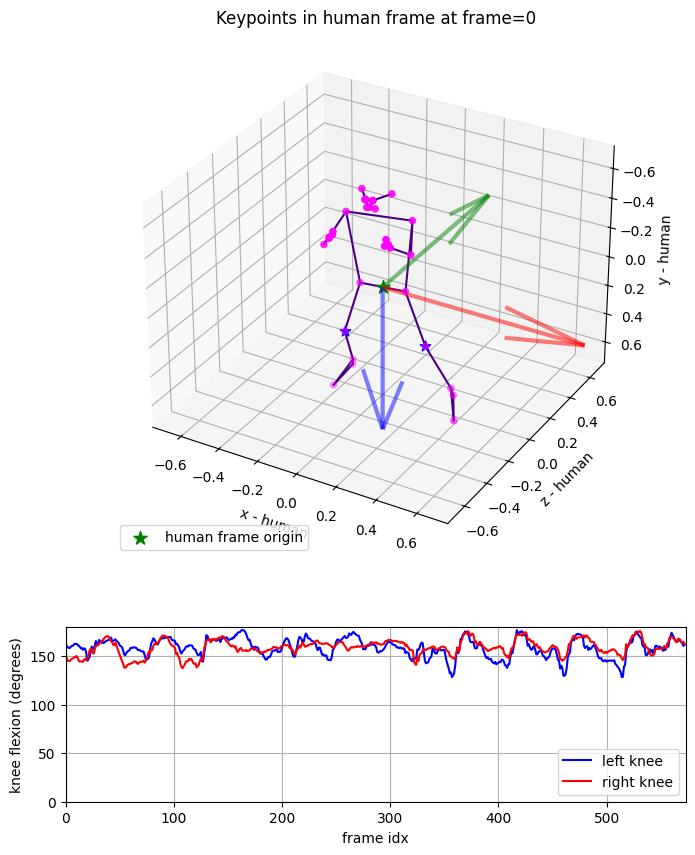

In [ ]:
from matplotlib.animation import FuncAnimation

import matplotlib.gridspec as gridspec

plt.close("all")
fig = plt.figure(figsize=(8, 10))
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1])

ax1 = fig.add_subplot(gs[0], projection="3d")
ax2 = fig.add_subplot(gs[1])

num_frames = len(pose_landmarker_results)

ax2.set(
    xlim=(0, num_frames),
    ylim=(0, 180),
    xlabel="frame idx",
    ylabel="knee flexion (degrees)",
)

left_angles = []
right_angles = []
for result in pose_landmarker_results[:num_frames]:
    left_knee_angle, right_knee_angle = (
        calculate_left_right_knee_flexion(result)
    )
    left_angles.append(left_knee_angle)
    right_angles.append(right_knee_angle)

ax2.plot(range(num_frames), left_angles, color="b", label="left knee")
ax2.plot(
    range(num_frames), right_angles, color="r", label="right knee"
)
ax2.grid(True)
ax2.legend(loc="lower right")

cursor_line = ax2.axvline(0, color="k", linestyle="--")

def update(frame_idx):
    ax1.cla()
    draw_3d_pose_human_frame(pose_landmarker_results[frame_idx], ax1)
    ax1.set_title(f"Keypoints in human frame at frame={frame_idx}")
    cursor_line.set_xdata([frame_idx])

anim = FuncAnimation(
    fig,
    update,
    frames=num_frames,
    interval=50,
)

# anim.save("pose_animation_knee.gif", writer="pillow", fps=15)
anim.save("pose_animation_knee.mp4", writer="ffmpeg", fps=15)

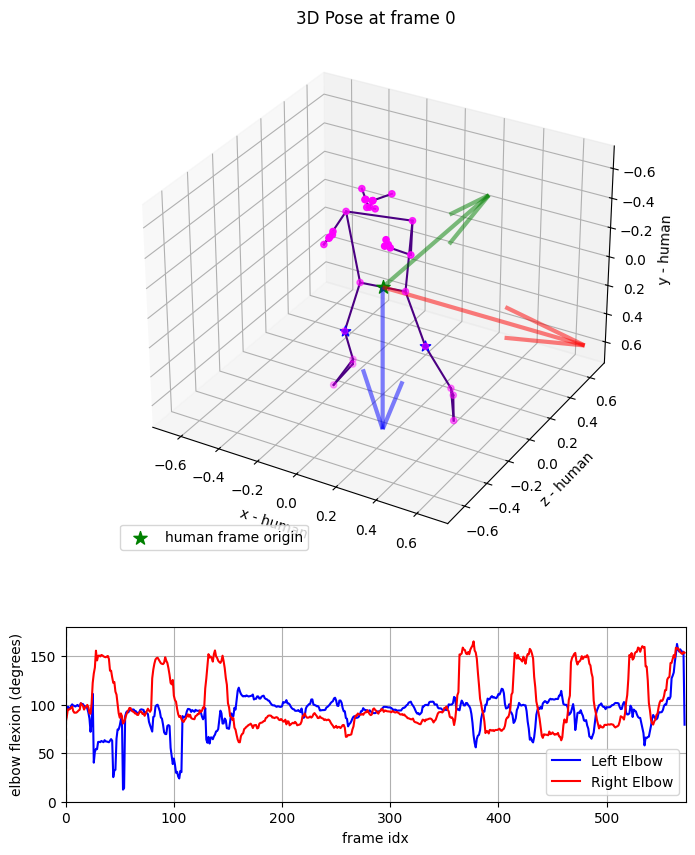

In [11]:
from matplotlib.animation import FuncAnimation
import matplotlib.gridspec as gridspec

# Close previous figures
plt.close("all")

# Create figure with 2 rows: top=3D pose, bottom=elbow angles
fig = plt.figure(figsize=(8, 10))
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1])

ax1 = fig.add_subplot(gs[0], projection="3d")
ax2 = fig.add_subplot(gs[1])

num_frames = len(pose_landmarker_results)

# Ax2 setup (elbow flexion angle plot)
ax2.set(
    xlim=(0, num_frames),
    ylim=(0, 180),
    xlabel="frame idx",
    ylabel="elbow flexion (degrees)",
)

# Precompute left and right elbow angles
left_elbow_angles = []
right_elbow_angles = []
for result in pose_landmarker_results[:num_frames]:
    left_angle, right_angle = calculate_left_right_elbow_flexion(result)
    left_elbow_angles.append(left_angle)
    right_elbow_angles.append(right_angle)

# Plot static elbow angle curves
ax2.plot(range(num_frames), left_elbow_angles, color="b", label="Left Elbow")
ax2.plot(range(num_frames), right_elbow_angles, color="r", label="Right Elbow")
ax2.grid(True)
ax2.legend(loc="lower right")

# Cursor line to move with animation
cursor_line = ax2.axvline(0, color="k", linestyle="--")

# Update function for each frame
def update(frame_idx):
    ax1.cla()
    draw_3d_pose_human_frame(pose_landmarker_results[frame_idx], ax1)
    ax1.set_title(f"3D Pose at frame {frame_idx}")
    cursor_line.set_xdata([frame_idx])

# Animate
anim = FuncAnimation(
    fig,
    update,
    frames=num_frames,
    interval=50,  # ms per frame
)

# anim.save("pose_animation_elbow.gif", writer="pillow", fps=15)
anim.save("pose_animation_elbow_2.mp4", writer="ffmpeg", fps=15)
